# Медианный фильтр

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

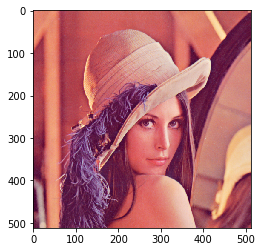

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

In [40]:
def median_filter(img, ksize):
    # если Ksize четный - приводим его к ближайшему нечетному
    if (ksize % 2 == 0):
        ksize += 1
    
    result = np.zeros_like(img)
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                #result[row, col, channel] = img[row, col, channel]
                # TODO: определяем текущее положение окна в координатах изображения
                pad = (ksize-1)//2
                window = np.zeros((ksize, ksize))
                
                xx = 0 
                yy = 0
                for x in range(row - pad, row + pad):
                    for y in range(col - pad, col + pad):
                        if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                            window[xx, yy] = img[x, y, channel]
                        yy += 1
                    yy = 0
                    xx += 1
                
                
                # TODO: вычислить медиану в окрестности х, y для окна размера ksize
                result[row, col, channel] = np.median(window)
    return result

## Добавляем случайный шум на изображение

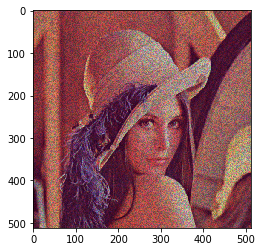

In [6]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [39]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…